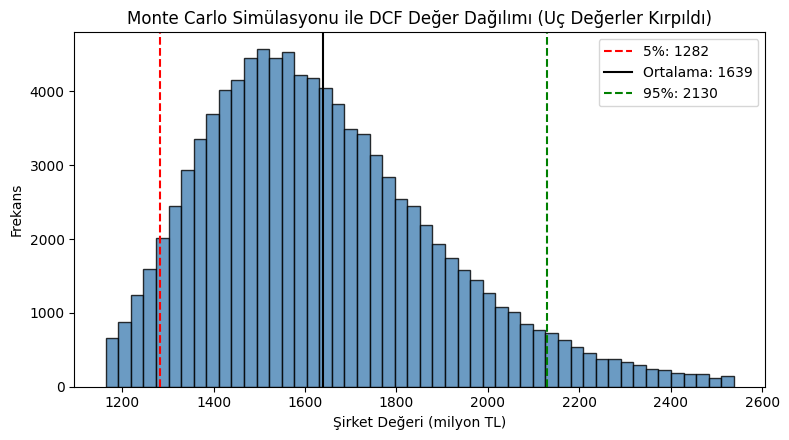

('dcf_monte_carlo_histogram_clean.png',
 (np.float64(1282.458134068021),
  np.float64(1602.7027613652222),
  np.float64(2129.8405650964073),
  np.float64(1639.1950980501047)))

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Daha anlaşılır bir DCF Monte Carlo simülasyonu

# Parametreler*
n_sim = 100000
cash_flow0 = 100  # milyon TL
years = 5

rng = np.random.default_rng(42)

# Dağılımlar
growth_rates = rng.normal(0.05, 0.02, (n_sim, years))   # %5 ± %2
discount_rates = rng.normal(0.10, 0.01, n_sim)          # %10 ± %1
terminal_growth = rng.normal(0.03, 0.005, n_sim)        # %3 ± %0.5

dcf_values = []
for i in range(n_sim):
    cf = cash_flow0
    pv = 0
    for t in range(1, years+1):
        cf *= (1 + growth_rates[i, t-1]) #Cash flow büyümesi her yıl için growth_rate ile çarpılır
        pv += cf / ((1 + discount_rates[i]) ** t) # İndirgenmiş nakit akışları toplanır
    # Terminal value yalnızca WACC > g ise hesaplansın
    if discount_rates[i] > terminal_growth[i]:
        tv = (cf * (1 + terminal_growth[i])) / (discount_rates[i] - terminal_growth[i]) # Terminal value hesaplanır cf'nin son yıl değeri ile terminal growth kullanılarak WACC - g ile bölünür
        pv += tv / ((1 + discount_rates[i]) ** years) # Terminal value'nun bugünkü değeri hesaplanır ve pv'ye eklenir
    dcf_values.append(pv) #dcf_values listesine bugünkü değer eklenir

dcf_values = np.array(dcf_values) # numpy array'e dönüştürülür

# Uç değerleri kırpalım (örneğin 1. ve 99. persentil arası)
low, high = np.percentile(dcf_values, [1, 99])
filtered_values = dcf_values[(dcf_values >= low) & (dcf_values <= high)]

# İstatistikler
p5, p50, p95 = np.percentile(filtered_values, [5, 50, 95])
mean_val = np.mean(filtered_values)

# Histogram
plt.figure(figsize=(8, 4.5))
plt.hist(filtered_values, bins=50, color="steelblue", edgecolor="black", alpha=0.8)
plt.axvline(p5, linestyle="--", color="red", label=f"5%: {p5:.0f}")
plt.axvline(mean_val, linestyle="-", color="black", label=f"Ortalama: {mean_val:.0f}")
plt.axvline(p95, linestyle="--", color="green", label=f"95%: {p95:.0f}")
plt.title("Monte Carlo Simülasyonu ile DCF Değer Dağılımı (Uç Değerler Kırpıldı)")
plt.xlabel("Şirket Değeri (milyon TL)")
plt.ylabel("Frekans")
plt.legend()

dcf_clean_path = "dcf_monte_carlo_histogram_clean.png"
plt.tight_layout()
plt.savefig(dcf_clean_path, dpi=200)
plt.show()

dcf_clean_path, (p5, p50, p95, mean_val)


# Üstteki kodun açıklaması:
# Bu kod, bir şirketin değerini Monte Carlo simülasyonu kullanarak tahmin etmek için DCF (Discounted Cash Flow) yöntemini uygular. İşte kodun detaylı açıklaması:
# 1. **Parametreler**: Simülasyon için gerekli parametreler tanımlanır. `n_sim` simülasyon sayısını, `cash_flow0` başlangıç nakit akışını ve `years` projeksiyon süresini belirtir.
# 2. **Rastgele Sayı Üretici**: `numpy` kütüphanesinin `default_rng` fonksiyonu kullanılarak rastgele sayı üreteci oluşturulur.
# 3. **Dağılımlar**: Nakit akış büyüme oranları growth rates, iskonto oranları(WACC) ve terminal büyüme oranları için normal dağılımlar oluşturulur. Bu dağılımlar simülasyon boyunca kullanılacak rastgele değerleri sağlar.
# 4. **DCF Hesaplaması**: Her simülasyon için nakit akışları hesaplanır ve bugünkü değerleri (PV) toplanır. Terminal değeri yalnızca iskonto oranı terminal büyüme oranından büyükse hesaplanır.
# 5. **Uç Değerlerin Kırpılması**: Hesaplanan DCF değerlerinden uç değerler (1. ve 99. persentil dışındakiler) çıkarılır, böylece analiz daha anlamlı hale gelir.